In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from ann import NeuralNet, pack_params, unpack_params

In [2]:
# Trial solution satisfying y(0) = 1.2
def y_trial(t, net):
    return 1.2 + t * net.forward(t)

In [3]:
# Derivative of the trial solution w.r.t t
def d_y_trial(t, net):
    return net.forward(t) + t * net.derivative(t)

In [4]:
# Right-hand side of the ODE
def ode_rhs(t, y):
    return 2 * y * (1 - y)

In [5]:
# Residual of the ODE
def residual(t, net):
    y_t = y_trial(t, net)
    d_y_t = d_y_trial(t, net)
    return d_y_t - ode_rhs(t, y_t)

In [6]:
# Loss function (Mean Squared Error of the residual)
def loss_fn(t, net):
    return np.mean(residual(t, net)**2)

In [7]:
# Objective function for the optimizer
def objective(params, net, t_train):
    unpack_params(net, params)
    return loss_fn(t_train, net)

In [8]:
# Function to train the neural network
def train_network(n_hidden, t_train):
    net = NeuralNet(n_hidden=n_hidden, n_output=1, activation='sigmoid')
    params0 = pack_params(net)
    result = minimize(objective, params0, args=(net, t_train),
                      method='BFGS', options={'disp': False, 'maxiter': 3000})
    unpack_params(net, result.x)
    return net

In [9]:
# Exact analytical solution
def exact_solution(t):
    return 6 / (6 - np.exp(-2 * t))

In [10]:
# Training points over the domain [0, 1]
t_train = np.linspace(0, 1, 100).reshape(-1, 1)

# Testing points for a smooth plot
t_test = np.linspace(0, 1, 300).reshape(-1, 1)

# Train the network with 10 hidden neurons
n_hidden_neurons = 10
trained_net = train_network(n_hidden_neurons, t_train)

# Get the exact and predicted solutions
y_exact = exact_solution(t_test).flatten()
y_pred = y_trial(t_test, trained_net).flatten()
loss = loss_fn(t_train, trained_net)
mse_vs_exact = np.mean((y_pred - y_exact)**2)

print(f"Final Residual Loss: {loss:.6e}")
print(f"Final MSE vs Exact Solution: {mse_vs_exact:.6e}")

Final Residual Loss: 1.014691e-06
Final MSE vs Exact Solution: 8.287002e-09


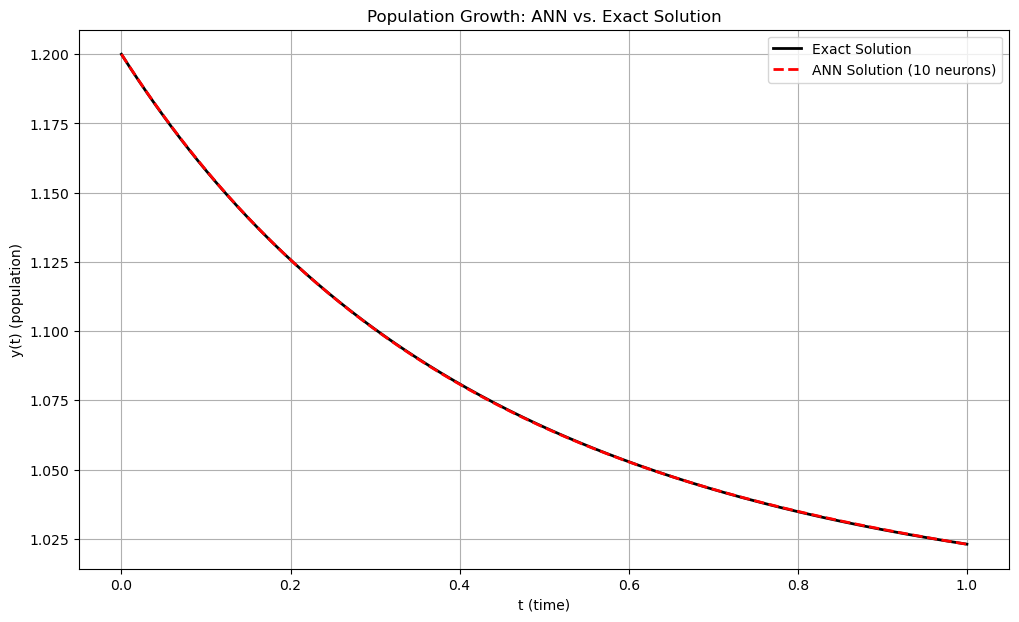

In [11]:
# Plot the ANN approximation vs. the exact solution
plt.figure(figsize=(12, 7))
plt.plot(t_test, y_exact, 'k', label='Exact Solution', linewidth=2)
plt.plot(t_test, y_pred, 'r--', label=f'ANN Solution ({n_hidden_neurons} neurons)', linewidth=2)
plt.xlabel("t (time)")
plt.ylabel("y(t) (population)")
plt.title("Population Growth: ANN vs. Exact Solution")
plt.grid(True)
plt.legend()
plt.savefig("Population_Growth.ipynb_20_1.png")
plt.show()

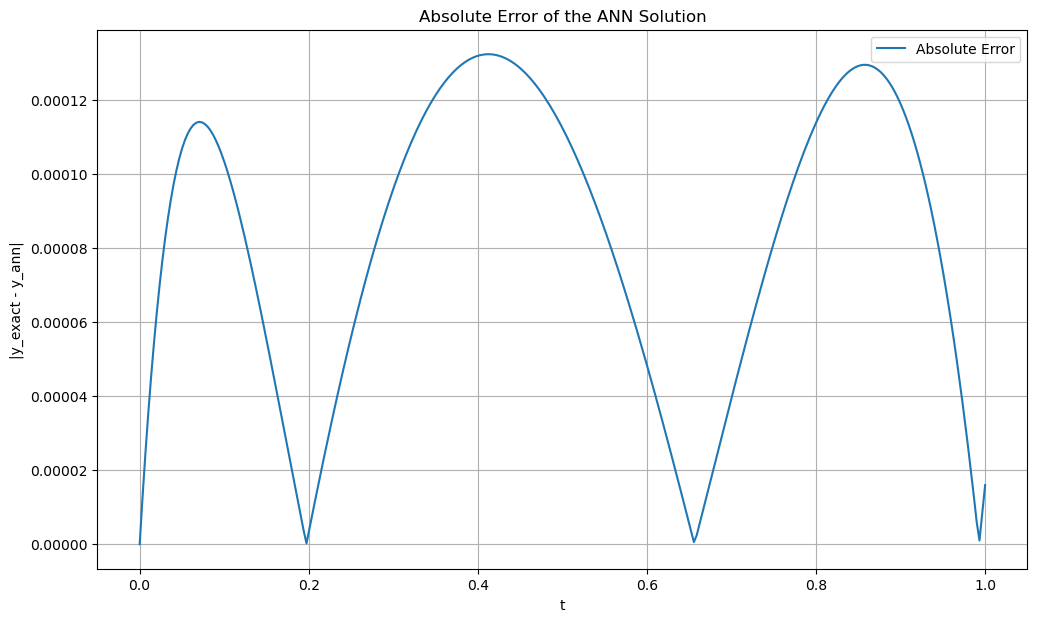

In [12]:
plt.figure(figsize=(12, 7))
abs_error = np.abs(y_pred - y_exact)
plt.plot(t_test, abs_error, label='Absolute Error')
plt.xlabel("t")
plt.ylabel("|y_exact - y_ann|")
plt.title("Absolute Error of the ANN Solution")
plt.grid(True)
plt.legend()
plt.savefig("Population_Growth.ipynb_14_1.png")
plt.show()